<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

**Описание проекта**

У нас есть архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Цель исследования**

Установить параметры для определения рыночной стоимости квартир.

**Описание данных**

Доступны два вида данных (`real_estate_data.csv`). Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

## Изучение данных из файла

Импортируем `pandas`:

In [1]:
import pandas as pd

Откроем файл с данными `real_estate_data.csv` и изучим общую информацию.

In [2]:
data = pd.read_csv('real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате csv.

Прочитаем данные ещё раз с учётом разделителя столбцов \t и выведем его первые 5 строк, а также извлечем основную информацию с помощью метода .info():

In [3]:
try:
    data = pd.read_csv('C:\\Anya\\аналитик_данных_яндекс\\Projects_github\\real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
    
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Предобработка данных

**Определим и изучим пропущенные значения:**

В 14 столбцах обнаружены пропущенные значения: 

1) ceiling_height (14504 non-null  float64) 

2) floors_total (23613 non-null  float64) 

3) living_area (21796 non-null  float64) 

4) is_apartment (2775 non-null   object) 

5) kitchen_area (21421 non-null  float64) 

6) balcony (12180 non-null  float64) 

7) locality_name (23650 non-null  object) 

8) airports_nearest (18157 non-null  float64) 

9) cityCenters_nearest (18180 non-null  float64)

10) parks_around3000 (18181 non-null  float64) 

11) parks_nearest (8079 non-null   float64) 

12) ponds_around3000 (18181 non-null  float64) 

13) ponds_nearest (9110 non-null   float64) 

14) days_exposition (20518 non-null  float64). 
 
Нужно разобраться, откуда возникли пропуски и заполнить их там, где это будет уместно.

Определим, какую долю составляют пропущенные значения в каждом из столбцов с пропусками.

In [4]:
data.isna().sum()  / data.shape[0]

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Самая большая доля пропусков в столбце `is_apartment` (0.882906). Сейчас этот столбец имеет тип данных object. Заменим его на булев с помощью метода .astype.

Далее заменим пропущенные значения на False, считая, что пропуски - это квартира, которая не является апартаментами.

In [5]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

Подсчитали количество пропущенных значений в каждом столбце. Теперь в колонке `is_apartment` нет пропущенных значений.

Рассмотрим столбец с пропущенными значениями `balcony`. Если человек не указал число балконов, то, скорее всего, их нет. Заменим такие пропуски на 0. 

In [6]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Рассмотрим столбец `airports_nearest` (расстояние до ближайшего аэропорта).

Посмотрим, есть ли связь между пропусками по расстоянию до аэропорта и городом. Создадим отдельную колонку, в которую занесем факт того, является ли значение пропуском (1) или не пропуском (0). Затем посчитаем общее число объявлений по городам и число объявлений с пропусками по городам.

In [7]:
display(data['airports_nearest'].isna().sum())

data['airports_nearest_isna'] = data['airports_nearest'].isna().astype(int)
df = data.groupby('locality_name')['airports_nearest_isna'].agg(['sum', 'count'])
display(df.shape[0]) # сколько всего городов в данных
df[df['sum'] == df['count']] 

5542

364

,sum,count
locality_name,,
Бокситогорск,16,16
Волосово,36,36
Волхов,111,111
Всеволожск,398,398
Выборг,237,237
...,...,...
село Путилово,2,2
село Рождествено,3,3
село Русско-Высоцкое,9,9


Получилось, что из 336 населенных пунктов из 364 имеют все пропуски. То есть, мы не сможем заменить пропущенные значения медианой или средним по городам. Заполним пропущенные значения как "unknown".

In [8]:
data['airports_nearest'] = data['airports_nearest'].fillna('unknown')
display(data['airports_nearest'].isna().sum())

0

Рассмотрим столбец `ceiling_height`(высота потолков).  Напишем цикл по уникальным городам (названиям населенных пунктов). Внутри цикла будем фильтровать этот город, затем рассчитывать медиану для замены и заполнять ей пропущенные значения.

In [9]:
display(data['ceiling_height'].isna().sum())

for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['ceiling_height'].median()
    data.loc[data['locality_name'] == city, 'ceiling_height'] = data['ceiling_height'].fillna(agg)

display(data['ceiling_height'].isna().sum())

9195

156

Было 9195 пропущенных значений, осталось 156. Заменим их медианой по всему столбцу.

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
display(data['ceiling_height'].isna().sum())

0

Рассмотрим столбец `floors_total` (количество этажей в доме). Поступим с ним так же, как и с `ceiling_height`.

In [11]:
display(data['floors_total'].isna().sum())

for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['floors_total'].median()
    data.loc[data['locality_name'] == city, 'floors_total'] = data['floors_total'].fillna(agg)

display(data['floors_total'].isna().sum())

data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
display(data['floors_total'].isna().sum())

86

1

0

Аналогично поступим со столбцами `kitchen_area` (площадь кухни) и `living_area` (жилая площадь).

In [12]:
display(data['kitchen_area'].isna().sum())

for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['kitchen_area'].median()
    data.loc[data['locality_name'] == city, 'kitchen_area'] = data['kitchen_area'].fillna(agg)

display(data['kitchen_area'].isna().sum())

data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
display(data['kitchen_area'].isna().sum())

for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['living_area'].median()
    data.loc[data['locality_name'] == city, 'living_area'] = data['living_area'].fillna(agg)

display(data['living_area'].isna().sum())

data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['living_area'].isna().sum()

2278

28

0

22

0

Рассмотрим столбец `cityCenters_nearest`  (расстояние до центра города).

In [13]:
display(data['cityCenters_nearest'].isna().sum())

for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['cityCenters_nearest'].median()
    data.loc[data['locality_name'] == city, 'cityCenters_nearest'] = data['cityCenters_nearest'].fillna(agg)

display(data['cityCenters_nearest'].isna().sum())

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['cityCenters_nearest'].isna().sum()

5519

5394

0

**Приведение данных к нужному типу**

Ранее заменили тип данных для столбца `is_apartment` (поменяли object на bool) с помощью метода .astype. Заменим тип данных для `floors_total` (количество этажей в доме), `balcony` (число балконов)  с float64 на int, так как эти значения могут быть только целым числом, а также `total_area` на float32.

In [14]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['total_area'] = data['total_area'].astype('float32')

## Расчёты и добавление результатов в таблицу

**Посчитаем цену квадратного метра. Для удобства округлим полученные значени. Добавим новый столбец в таблицу.**

In [15]:
data['price'] = round(data['last_price'] / data['total_area'], 2)
data['price']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_isna,price
0,20,13000000.0,108.000000,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0,120370.37
1,7,3350000.0,40.400002,2018-12-04T00:00:00,1,2.63,11,18.6,1,True,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0,82920.79
2,10,5196000.0,56.000000,2015-08-20T00:00:00,2,2.70,5,34.3,4,True,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0,92785.71
3,0,64900000.0,159.000000,2015-07-24T00:00:00,3,2.70,14,31.3,9,True,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0,408176.10
4,2,10000000.0,100.000000,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0,100000.00


**Посчитаем и добавим в таблицу день недели, месяц и год публикации объявления.**

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).day
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_isna,price,weekday,month,year
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,0,120370.37,7,3,2019
1,7,3350000.0,40.400002,2018-12-04,1,2.63,11,18.6,1,True,...,0.0,NaN,0.0,NaN,81.0,0,82920.79,4,12,2018
2,10,5196000.0,56.000000,2015-08-20,2,2.70,5,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,0,92785.71,20,8,2015
3,0,64900000.0,159.000000,2015-07-24,3,2.70,14,31.3,9,True,...,2.0,84.0,3.0,234.0,424.0,0,408176.10,24,7,2015
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.0,13,True,...,2.0,112.0,1.0,48.0,121.0,0,100000.00,19,6,2018


**Посчитаем и добавим в таблицу название этажа квартиры: первый, последний, другой.**

In [17]:
def floor_name(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
         return 'другой'
        
data['floor_name'] = data.apply(floor_name, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_isna,price,weekday,month,year,floor_name
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,0,120370.37,7,3,2019,другой
1,7,3350000.0,40.400002,2018-12-04,1,2.63,11,18.6,1,True,...,NaN,0.0,NaN,81.0,0,82920.79,4,12,2018,первый
2,10,5196000.0,56.000000,2015-08-20,2,2.70,5,34.3,4,True,...,90.0,2.0,574.0,558.0,0,92785.71,20,8,2015,другой
3,0,64900000.0,159.000000,2015-07-24,3,2.70,14,31.3,9,True,...,84.0,3.0,234.0,424.0,0,408176.10,24,7,2015,другой
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,0,100000.00,19,6,2018,другой


**Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей. Добавим новые столбцы в таблицу.**

In [18]:
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,airports_nearest_isna,price,weekday,month,year,floor_name,living_area_part,kitchen_area_part
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.0,8,True,...,755.0,NaN,0,120370.37,7,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,2.63,11,18.6,1,True,...,NaN,81.0,0,82920.79,4,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,2.70,5,34.3,4,True,...,574.0,558.0,0,92785.71,20,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,2.70,14,31.3,9,True,...,234.0,424.0,0,408176.10,24,7,2015,другой,0.196855,0.062264
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.0,13,True,...,48.0,121.0,0,100000.00,19,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

**Изучим следующие параметры: площадь (total_area), цена (last_price ), число комнат (rooms), высота потолков (ceiling_height). Построим гистограммы для каждого параметра.**

1) Начнем с площади жилого помещения (total_area).

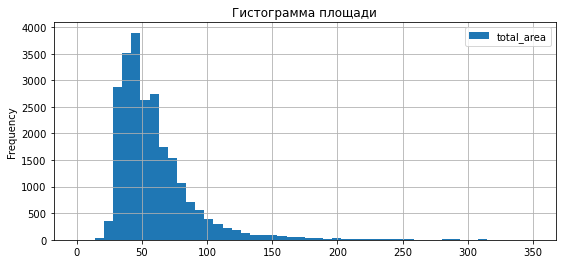

564

In [19]:
import matplotlib.pyplot as plt 
data.plot(kind='hist', y='total_area', range=(0, 350), grid=True, figsize=(9, 4), bins=50)
plt.title('Гистограмма площади')
plt.show()
len(data.query('total_area > 150'))

Посмотрим среднее значение и медиану с помощью метода .describe().

In [20]:
data['total_area'].describe()

count    23699.000000
mean        60.348774
std         35.654266
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area, dtype: float64

Видим пик на гистограмме вблизи значения площади 50. Медиана 52.000000, среднее 60.348651. Значения немного отличаются из-за небольшого хвоста. Значение медианы примерно совпадает с тем, что мы видим на гистограмме. 

Значений площади > 150 совсем мало (564). Избавимся от них. Зададим условие data.query('total_area < 150')

2) Рассмотрим гистограмму для цены (last_price).

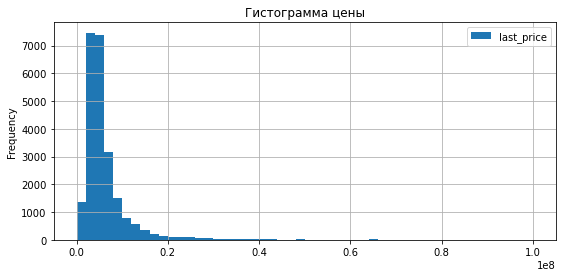

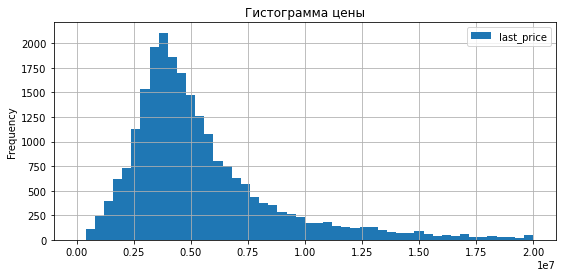

In [21]:
data.plot(kind='hist', y='last_price', grid=True, range=(0, 100000000), figsize=(9, 4), bins=50)
plt.title('Гистограмма цены')
plt.show()
data.plot(kind='hist', y='last_price', grid=True, range=(0, 20000000), figsize=(9, 4), bins=50)
plt.title('Гистограмма цены')
plt.show()

In [22]:
len(data.query('last_price > 15000000'))

1204

Пик цены находится в районе 3 млн. Значений больше 15 млн совсем мало. Зададим верхнюю границу для цены 15 млн. Далее будем рассматривать данные, удовлетворяющие условию data.query('last_price < 15000000').

3) Рассмотрим гистограмму для числа комнат (rooms).

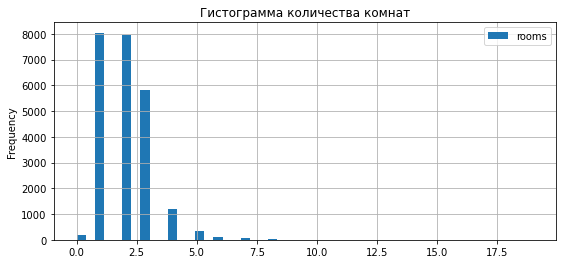

19

1

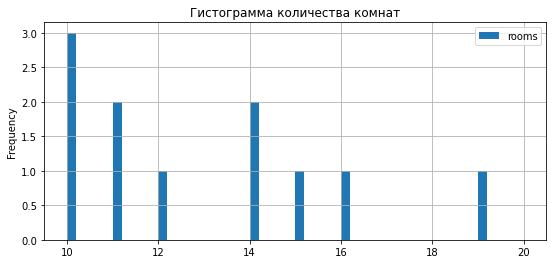

195

In [23]:
data.plot(kind='hist', y='rooms', grid=True, figsize=(9, 4), bins=50)
plt.title('Гистограмма количества комнат')
plt.show()

display(data['rooms'].max())
display(len(data.query('rooms == 19')))

data.plot(kind='hist', y='rooms', grid=True, figsize=(9, 4), bins=50, range=(10, 20))
plt.title('Гистограмма количества комнат')
plt.show()

len(data.query('rooms > 5'))

Большинство жилых площадей имеют 1 или 2 комнаты. Жилых помещение с числом комнат больше 5 совсем мало (195). Но есть 1 жилое помещение с 19 комнатами. Это выброс. Далее будем рассматривать данные, удовлетворяющие условию data.query('rooms <= 5')

4) Рассмотрим гистограмму для высоты потолков (ceiling_height).

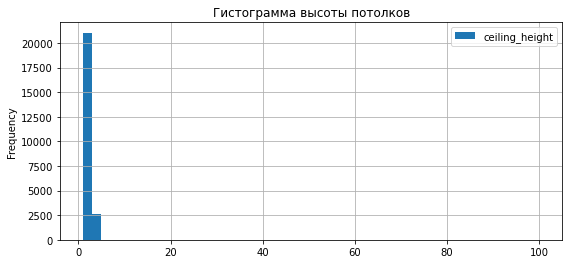

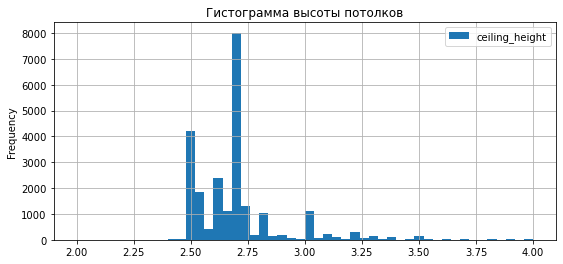

count    23699.000000
mean         2.733877
std          1.009388
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [24]:
data.plot(kind='hist', y='ceiling_height', grid=True, figsize=(9, 4), bins=50)
plt.title('Гистограмма высоты потолков')
plt.show()

data.plot(kind='hist', y='ceiling_height', grid=True, figsize=(9, 4), bins=50, range=(2, 4))
plt.title('Гистограмма высоты потолков')
plt.show()

data['ceiling_height'].describe()

In [25]:
display(len(data.query('ceiling_height > 3.5')))
len(data.query('ceiling_height < 2.3'))

322

16

Мы заполняли пропущенные значения в столбце ceiling_height медианой. Сейчас на гистограмме видны аномалии.
Средняя высота потолков по гистограмме находится в между 2,5 и 3 метрами. Обнаружена явная аномалия со значением 100 метров. Также совсем малое количество жилых помещений имеет высоту меньше 2.3 метров (16), больше 3.5 метров (322). Зададим верхнюю границу для высоты потолков в 4 метра, а нижнюю 2 метра. Далее будем рассматривать данные, удовлетворяющие условиям data.query('ceiling_height > 2.3 and ceiling_height < 3.5').

**Изучим время продажи квартиры (days_exposition).**

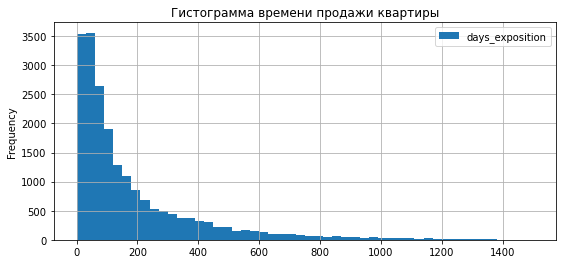

23699

1198

In [26]:
data.plot(kind='hist', y='days_exposition', grid=True, figsize=(9, 4), bins=50, range=(0, 1500))
plt.title('Гистограмма времени продажи квартиры')
plt.show()

data['days_exposition'].describe()
display(len(data['days_exposition']))
len(data.query('days_exposition > 600'))

Получим значения медианы и среднего с помощью метода .describe.

Среднее значение времени продажи равно 180.888634 дней. Это почти в 2 раза больше медианы (95.000000). Это значит, что в распределении есть длинный хвост с высокими значениями (что мы и видим на гистограмме). Это влияет на среднее, но не на медиану. Также значение стандартного отклонения очень велико (219.727988), значит, в данных присутствуют явные аномалии или выбросы. Далее будем рассматривать данные, удовлетворяющие условию days_explosition < 600. Это примерно 5% данных (наш хвост). Построим новое распределение с учетом этого условия. 

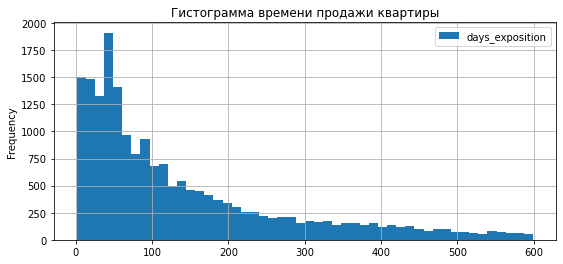

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [27]:
data.query('days_exposition < 600').plot(kind='hist', y='days_exposition', grid=True, figsize=(9, 4), bins=50)
plt.title('Гистограмма времени продажи квартиры')
plt.show()

data['days_exposition'].describe()

Будем считать, что продажи идут очень быстро при значениях days_exposition меньше медианы, а необычно долго при days_exposition больше среднего значения.

days_exposition_fast = days_exposition < 95  
days_exposition_long = days_exposition > 180  

Посчитаем доли быстрых и медленных продаж:

In [28]:
display(len(data.query('days_exposition < 95')) / len(data))
len(data.query('days_exposition > 180')) / len(data)

0.43048229883117434

0.27435756782986626

**Соберем 6 условий для разных столбцов вместе, чтобы убрать редкие и выбивающиеся значения из нашего датафрейма. Создадим новый датафрейм `good_data` с "хорошими" значениями.**

In [29]:
display(len(data))
good_data = data.query('(total_area < 150) and (last_price < 15000000) and (rooms <= 5) and (ceiling_height > 2.3) and (ceiling_height < 3.5) and (days_exposition < 600)')
len(good_data)

23699

18249

**Посмотрим, какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена (last_price) от площади (total_area), числа комнат (rooms), удалённости от центра (cityCenters_nearest).**

1) Исследуем, есть ли зависимость цены (last_price) от площади жилого помещения (total_area). 

Чтобы найти связь между ценой и площадью, их нужно отметить на одном графике, а не на отдельных гистограммах. Зададим площадь и цену на осях X и Y соответственно:

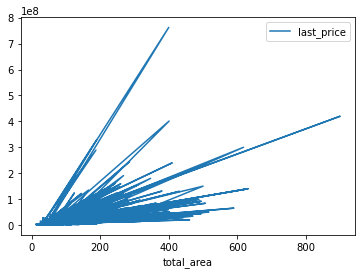

In [30]:
data.plot(x='total_area', y='last_price')
plt.show()

Исходные данные не были отсортированы. Избавимся от разбросанных значений, соединённых линиями. Отсортируем данные.

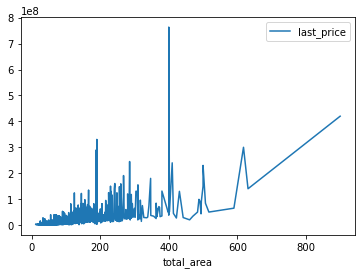

In [31]:
data.sort_values('total_area').plot(x='total_area', y='last_price')
plt.show()

График, где значения соединяются линиями, хорош, если иллюстрирует непрерывную связь. Гораздо лучше обозначить отдельные сочетания цены и площади точками. Это возможно сделать с помощью диаграммы рассеяния. Передадим значение scatter параметру kind метода plot().

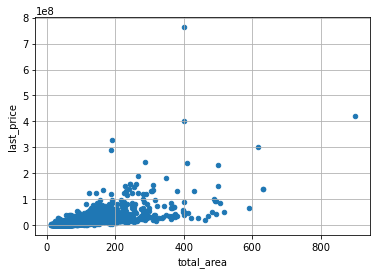

count    23699.000000
mean        60.348774
std         35.654266
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area, dtype: float64

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [32]:
data.sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter', grid=True)
plt.show()
display(data['total_area'].describe())
data['last_price'].describe()

Такой график уже лучше отражает действительность. Есть основная масса точек с наиболее частыми сочетаниями цены и площади. При этом с увеличением площади увеличивается и цена. Но это лишь в среднем. Можно найти уникальные примеры жилых помещений с большой площадью и не самой большой ценой.
На графике видно, что большинство значений total_area лежит в области от 0 до 400 при last_price от 0 до 100 000 000. Рассмотрим ее поближе.

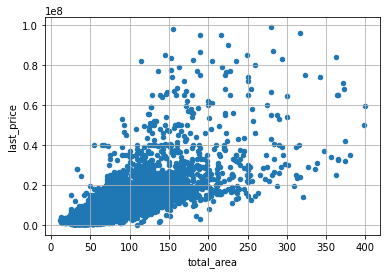

In [33]:
data.query('(total_area < 400) and (last_price < 100000000)').sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter', grid=True)
plt.show()

По этому графику уже лучше видна взаимосвязь цены с площадью. При увеличении площади жилого помещения увеличивается и цена. Посчитаем коэффициент корреляции Пирсона.

In [34]:
data['last_price'].corr(data['total_area'])

0.6536750582766911

Корреляция в 0.65 говорит о наличии средней связи. Выходит, увеличение площади сопровождается увеличением цены, но так бывает не всегда.

2) Проверим наличие связи между количеством комнат (rooms) и ценой (last_price). Аналогично построим диаграмму рассеяния.

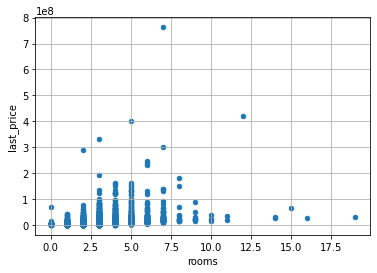

In [35]:
data.sort_values('rooms').plot(x='rooms', y='last_price', kind='scatter', grid=True)
plt.show()

Здесь видны аномалии и выбросы, но ранее мы уже рассматривали гистограмму для параметра rooms и задали не него условие `rooms < 5`. Мы создали новый датафрейм, который включал в себя и это условие, поэтому сейчас построим новый график для "хороших" значений.

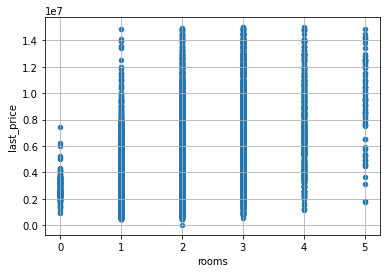

In [36]:
good_data.sort_values('rooms').plot(x='rooms', y='last_price', kind='scatter', grid=True)
plt.show()

Наблюдается аномалия. При отсутствии комнат цена на них все равно есть. Посчитаем количество таких комнат и их долю среди всех комнат.

In [37]:
display(len(data.query('rooms < 1')))
len(data.query('rooms < 1')) / len(data)

197

0.008312587028988565

Эти данные составляют всего лишь 0,8% от всех. Удалим их и обновим наш датафрейм good_data с учетом нового условия `rooms >= 1`

In [38]:
len(good_data)

18249

In [39]:
good_data = good_data.query('rooms >=1')
len(good_data)

18075

Из графика видно, что связи между числом комнат и ценой почти нет. Проверим это, посчитав коэффициент корреляции.

In [40]:
data['rooms'].corr(data['last_price'])

0.3633428499648938

Значение коэффициента корреляции 0,36. Связь очень слабая.

3) Проверим наличие связи между расстоянием от центра (cityCenters_nearest) и ценой (last_price). Аналогично построим диаграмму рассеяния.

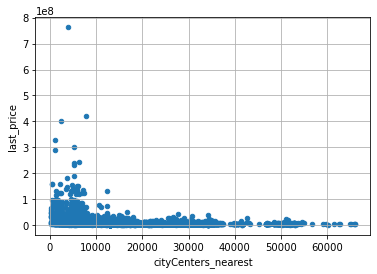

In [41]:
data.sort_values('cityCenters_nearest').plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True)
plt.show()

Наблюдается значительный разброс по расстояниям. Но цена для большинства значений расстояний находится в пределах от 0 до 100000000 (100 млн). Видно, что для расстояний от центра меньше 10000 м, цена наибольшая. Посмотрим на срез cityCenters_nearest < 10000.

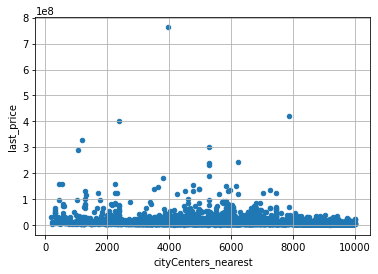

In [42]:
data.query('cityCenters_nearest < 10000').sort_values('cityCenters_nearest').plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True)
plt.show()

Для расстояния в 4000 метров имеется выброс в районе 800 млн. Проверим, какую долю состалвяют значения last_price > 15000000 от всех значений.

In [43]:
len(data.query('last_price > 15000000')) / len(data)

0.050803831385290515

Получилось всего 5 %. Посмотрим на диаграмму рассеяния с этим новым условием.

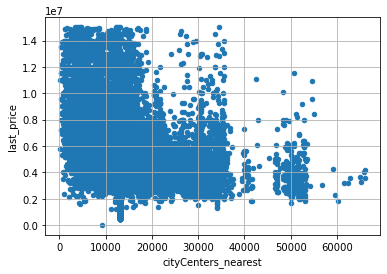

In [44]:
data.query('last_price < 15000000').sort_values('cityCenters_nearest').plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True)
plt.show()

Видно, что цена распределена равномерно на участке 0 < cityCenters_nearest < 40000. То есть, нет зависимости цены от расстояния до центра. Посчитаем коэффициент корреляции.

In [45]:
data['cityCenters_nearest'].corr(data['last_price'])

-0.19187000632216877

Значение коэффициента корреляции -0,19. Корреляция очень слабая.

Изучим зависимость цены от того, на каком этаже расположена квартира (floor_name): первом, последнем или другом. 

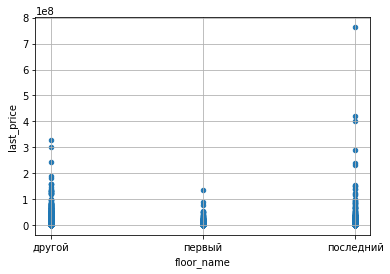

In [46]:
data.sort_values('floor_name').plot(x='floor_name', y='last_price', kind='scatter', grid=True)
plt.show()

Из диаграммы рассеяния можно считать, что зависимости никакой нет.

Также изучим зависимость от даты размещения (first_day_exposition): дня недели (weekday), месяца (month) и года (year).

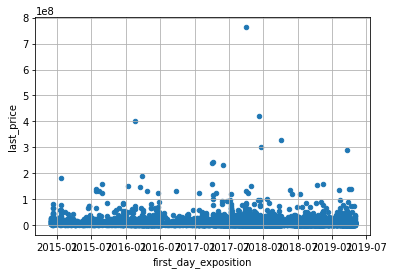

In [47]:
data.sort_values('first_day_exposition').plot(x='first_day_exposition', y='last_price', kind='scatter', grid=True)
plt.show()

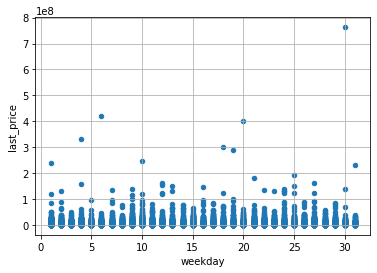

0.00917150529824084

In [48]:
data.sort_values('weekday').plot(x='weekday', y='last_price', kind='scatter', grid=True)
plt.show()
data['weekday'].corr(data['last_price'])

На диаграмме рассеяния last price - weekday виден выброс при weekday = 30. Какой-либо зависимости не наблюдается. Коэффициент корреляции тоже очень мал.

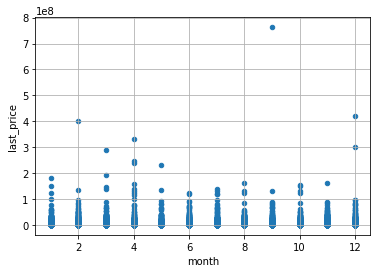

0.0027791287507396983

In [49]:
data.sort_values('month').plot(x='month', y='last_price', kind='scatter', grid=True)
plt.show()
data['month'].corr(data['last_price'])

На диаграмме рассеяния last price - month виден выброс при month = 9. Какой-либо зависимости не наблюдается. Коэффициент корреляции тоже очень мал. Видно равномерное распределение цены по месяцам.

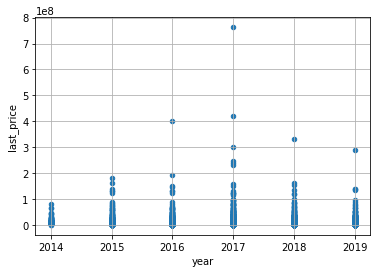

-0.043089036199507054

In [50]:
data.sort_values('year').plot(x='year', y='last_price', kind='scatter', grid=True)
plt.show()
data['year'].corr(data['last_price'])

Меньше всего цена для квартир 2014 года. По остальным квартирам цена примерно одинакова. Она находится в пределах между 0 и 200 млн за исключением нескольких выбросов в 2016, 2017 и 2018 годах.

Построим матрицу корреляции для всех этих значений (день недели, месяц, год) вместе.

            last_price     month   weekday      year
last_price    1.000000  0.013328  0.047899 -0.109505
month         0.013328  1.000000  0.014374 -0.233560
weekday       0.047899  0.014374  1.000000 -0.024525
year         -0.109505 -0.233560 -0.024525  1.000000


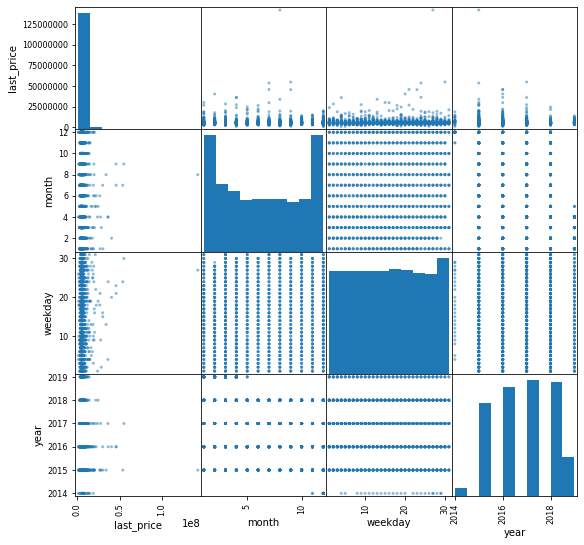

In [51]:
week_day_month = data.pivot_table(index='first_day_exposition', values=['weekday', 'month', 'year', 'last_price'])
print(week_day_month.corr())
pd.plotting.scatter_matrix(week_day_month, figsize=(9, 9))
plt.show()

**Промежуточный вывод 1**:  Изучили несколько факторов. которые могут влиять на стоимость квартиры: площади, число комнат, удалённость от центра, этаж и дата размещения. Построили диаграммы рассеяния, посчитали коэффициента корреляции. Выявили наибольшую зависимость между площадью жилого помещения и ценой. Корреляция в 0.65 говорит о наличии средней связи. Выходит, увеличение площади сопровождается увеличением цены, но так бывает не всегда.

**Выберим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья (возьмем эти данные из столбца locality_name).** Вычисления будем производить для датафрейма good_data (в котором нет аномалий и выбросов).

In [52]:
good_data['one_meter'] = good_data['last_price'] / good_data['living_area']

popular_locality = good_data.pivot_table(index='locality_name', values='one_meter', aggfunc=('count', 'mean')).astype(int)
popular_locality = popular_locality.sort_values(by='count', ascending=False)
popular_locality.head(10)

,count,mean
locality_name,,
Санкт-Петербург,11733,197341
посёлок Мурино,470,180883
посёлок Шушары,389,155535
Всеволожск,309,128565
Колпино,298,130628
посёлок Парголово,288,206292
Пушкин,269,184444
деревня Кудрово,261,198239
Гатчина,249,119895


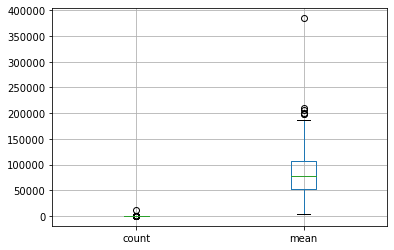

In [53]:
popular_locality.boxplot()
plt.show()

Самая высокая стоимость жилья в Санкт-Петербурге, а самая низкая в Выборге.

Далее изучим предложения квартир. Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах и посчитаем среднюю цену для каждого километра.

In [54]:
good_data.query('locality_name == "Санкт-Петербург"')
good_data['dist_km'] = (good_data['cityCenters_nearest'] / 1000).astype(int)
#(good_data['last_price'] / good_data['dist_km']).mean()
aver_price = good_data.groupby('dist_km')['last_price'].mean()
display(aver_price.head())

dist_km
0    8.404111e+06
1    8.733917e+06
2    8.150202e+06
3    7.853961e+06
4    8.285229e+06
Name: last_price, dtype: float64

Построим график, который будет показывать, как цена зависит от удалённости от центра.

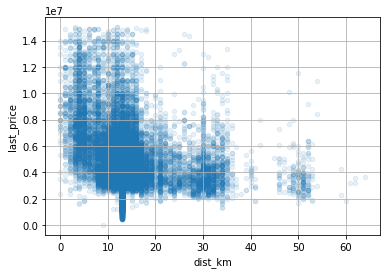

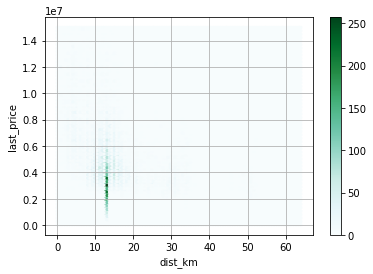

In [55]:
good_data.sort_values('dist_km').plot(x='dist_km', y='last_price', kind='scatter', grid=True, alpha=0.1)
good_data.plot(x='dist_km', y='last_price', kind='hexbin', sharex=False, grid=True)
plt.show()

Определим границу, где график сильно меняется, — это и будет центральная зона. В самой густой зоне находятся расстояния в промежутке между 10 и 12 км и с ценой от 1 млн до 6 млн.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь (total_area), цена (last_price), высота потолков (ceiling_height). Также выделите факторы, которые влияют на стоимость квартиры (число комнат (rooms), этаж (floor), удалённость от центра (cityCenters_nearest), дата размещения объявления (first_day_exposition)).

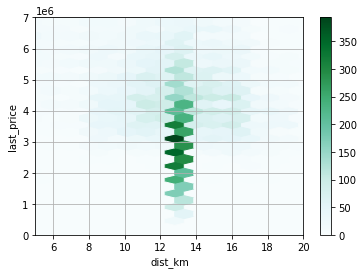

,ceiling_height,cityCenters_nearest,dist_km,floor,last_price,month,rooms,total_area,weekday,year
locality_name,,,,,,,,,,
деревня Глинка,3.100000,13101.000000,13.000000,4.000000,4.800000e+06,2.000000,3.000000,103.000000,8.000000,2018.000000
городской посёлок Рощино,2.620000,13101.000000,13.000000,9.000000,4.780000e+06,2.000000,2.000000,53.810001,25.000000,2019.000000
коттеджный поселок Счастье,3.000000,13101.000000,13.000000,2.000000,4.650000e+06,11.000000,1.000000,72.000000,22.000000,2017.000000
деревня Заневка,2.675000,13101.000000,13.000000,3.000000,4.000000e+06,2.000000,1.500000,47.349998,14.000000,2018.500000
Санкт-Петербург,2.638745,13545.216511,13.034579,6.176636,3.993643e+06,6.648598,1.530218,41.578712,15.285047,2017.323053
поселок Жилгородок,2.700000,13101.000000,13.000000,1.000000,3.940000e+06,8.000000,3.000000,72.300003,16.000000,2017.000000
деревня Пикколово,2.700000,13101.000000,13.000000,2.000000,3.850000e+06,9.000000,2.000000,72.300003,29.000000,2017.000000
деревня Кальтино,2.740000,13101.000000,13.000000,3.800000,3.829000e+06,8.600000,1.400000,55.240002,19.200000,2017.600000
посёлок городского типа Форносово,2.500000,13101.000000,13.000000,3.000000,3.790000e+06,10.000000,3.000000,60.000000,19.000000,2018.000000


In [56]:
good_data.plot(x='dist_km', y='last_price', kind='hexbin', gridsize=60, sharex=False, grid=True, xlim=(5, 20), ylim=(0, 7000000))
plt.show()

good_data.query('(dist_km < 16) and (dist_km > 10) and (last_price > 1000000) and (last_price < 5000000)')
center = good_data.query('(dist_km < 16) and (dist_km > 10) and (last_price > 1000000) and (last_price < 5000000)').pivot_table(index='locality_name', values=['rooms', 'floor', 'cityCenters_nearest', 'month', 'weekday', 'year', 'total_area', 'ceiling_height', 'last_price', 'dist_km'])
center.sort_values(by='last_price', ascending=False).head(10)

Построим диаграммы рассеяния и посчитаем коэффициенты корреляции для параметров, указанных выше (площадь - total_area, цена - last_price, высота потолков - ceiling_height, число комнат - rooms, этаж - floor, удалённость от центра - cityCenters_nearest и дата размещения объявления - first_day_exposition). Используем наш новый датафрейм center (жилые помещения в центре).

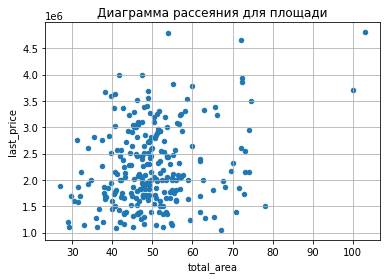

0.256453279050249

In [57]:
center.sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter', grid=True, title='Диаграмма рассеяния для площади')
plt.show()
center['total_area'].corr(center['last_price'])

По этому графику видно, что большая площадь total_area сосредоточена в промежутке от 40 до 60 с ценой last_price от 1 млн до 3 млн.

Корреляция в 0.25 говорит о совсем слабой связи.

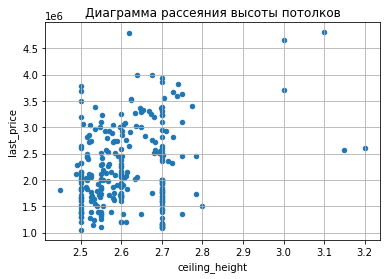

0.2918841600801226

In [58]:
center.sort_values('ceiling_height').plot(x='ceiling_height', y='last_price', kind='scatter', grid=True, title='Диаграмма рассеяния высоты потолков')
plt.show()

center['ceiling_height'].corr(center['last_price'])

Высота потолков почти вся сосредоточена между 2.5 и 2.7 метров. По графику видно, что зависимости между ценой и высотой потолков нет.
Корреляция тоже очень слабая (0.29).

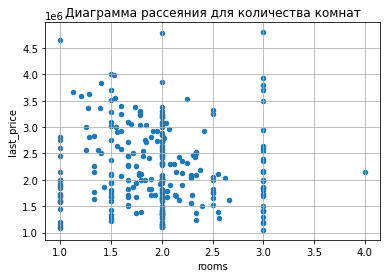

-0.07192706440085375

In [59]:
center.sort_values('rooms').plot(x='rooms', y='last_price', kind='scatter', grid=True, title='Диаграмма рассеяния для количества комнат')
plt.show()

center['rooms'].corr(center['last_price'])

Зависимости цены от количества комнат тоже нет. Корреляция очень мала (-0.07).

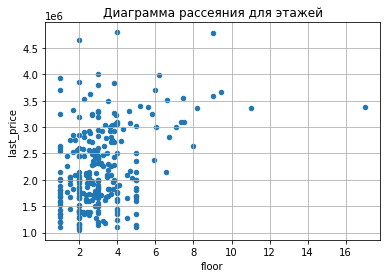

0.3601110669297396

In [60]:
center.sort_values('floor').plot(x='floor', y='last_price', kind='scatter', grid=True, title='Диаграмма рассеяния для этажей')
plt.show()

center['floor'].corr(center['last_price'])

Большая часть жилых помещений сосредоточена между 1 и 6 этажами. Цены не зависит от этажа.

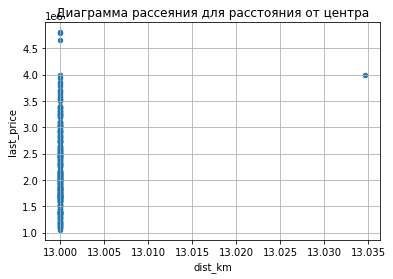

In [61]:
center.sort_values('dist_km').plot(x='dist_km', y='last_price', kind='scatter', grid=True, title='Диаграмма рассеяния для расстояния от центра')
plt.show()

Есть одиночный выброс при расстоянии от центра больше 13 км. Уберем его и посмотрим данны в срезе dist_km < 13.005.

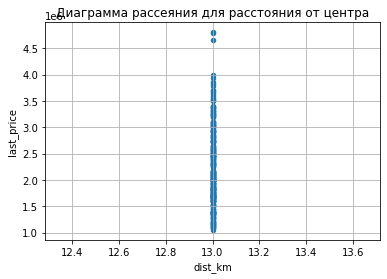

0.14472811709800434

In [62]:
center.query('dist_km < 13.005').sort_values('dist_km').plot(x='dist_km', y='last_price', kind='scatter', grid=True, title='Диаграмма рассеяния для расстояния от центра')
plt.show()
center['dist_km'].corr(center['last_price'])

Для расстояния от центра вблизи 13 км цена равномерно распределена от 1 до 4 млн. Коэффициент корреляции очень мал, зависимости нет.

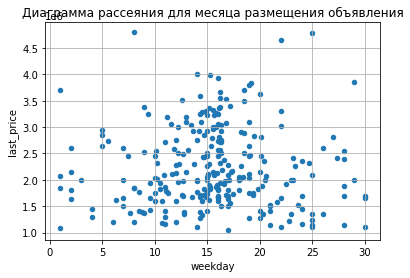

-0.004698838682176628

In [63]:
center.sort_values('weekday').plot(x='weekday', y='last_price', kind='scatter', grid=True, title='Диаграмма рассеяния для месяца размещения объявления')
plt.show()
center['weekday'].corr(center['last_price'])

Цена от месяца тоже не зависит.

Построим матрицу корреляции для дня недели, месяца и года публикации объявления.

,last_price,month,weekday,year
last_price,1.000000,0.057244,0.181069,0.029394
month,0.057244,1.000000,0.226492,-0.121670
weekday,0.181069,0.226492,1.000000,0.019570
year,0.029394,-0.121670,0.019570,1.000000


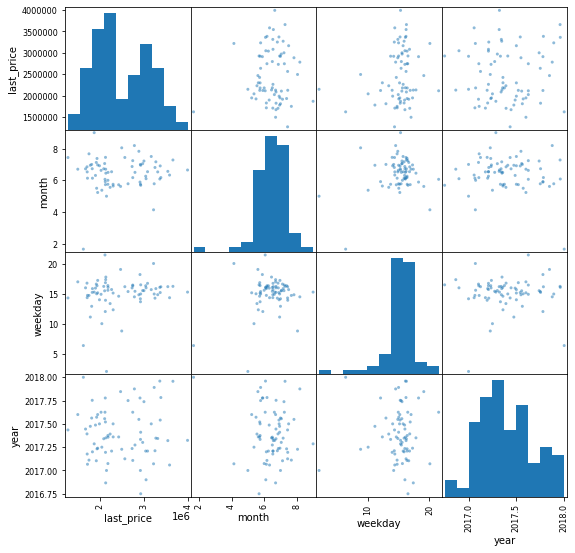

In [64]:
week_day_month = center.pivot_table(index='rooms', values=['weekday', 'month', 'year', 'last_price'])
display(week_day_month.corr())
pd.plotting.scatter_matrix(week_day_month, figsize=(9, 9))
plt.show()

Из матрицы видно, что зависимости цены от даты публикации объявления тоже нет. Коэффициенты корреляции малы.

## Общий вывод

1) Мы изучили следующие параметры: площадь, цена, число комнат, высота потолков. Построили гистограммы для каждого параметра. Убрали редкие и выбивающиеся значения.

2) Изучили время продажи квартиры, посчитали среднее и медиану. Определили, что продажи идут очень быстро при значениях days_exposition (сколько дней было размещено объявление) меньше медианы, а необычно долго при days_exposition больше среднего значения.
days_exposition_fast = days_exposition < 95
days_exposition_long = days_exposition > 180  

3) Мы посмотрели, какие факторы больше всего влияют на стоимость квартиры. Изучили, зависит ли цена от площади, числа комнат, удалённости от центра, этажа и даты размещения. Для этого построили диаграммы рассеяния. Выявили, что больше всего на стоимость квартиры влияет ее площадь. Корреляция в 0.65 говорит о наличии средней связи. Выходит, увеличение площади сопровождается увеличением цены, но так бывает не всегда.  
Зависимости между числом комнат и ценой почти нет (коэффициент корреляции 0,36). Для расстояния от центра корреляция еще меньше (-0,19). Для даты размещения построили матрицу корреляции для всех этих значений (день недели, месяц, год) вместе. Меньше всего цена для квартир 2014 года. По остальным квартирам цена примерно одинакова. Она находится в пределах между 0 и 200 млн за исключением нескольких выбросов в 2016, 2017 и 2018 годах. Корреляция мала.

4) Затем мы сделали выборку из 10 населённых пунктов с наибольшим числом объявлений. Посчитали среднюю цену квадратного метра в этих населённых пунктах. Выделили среди них населённые пункты с самой высокой и низкой стоимостью жилья и изучили предложения квартир. Выявили центральную область - расстояния в промежутке между 10 и 12 км и с ценой от 1 млн до 6 млн.

5) Выделили сегмент квартир в центре. Проанализировали эту территорию и изучили следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Выявили, что корреляциия для площади жилого помещения и цены мала (0.25) в отличие от предыдущих расчетов, где она составляла 0.65. Остальные параметры еще меньше влияют на стоимость квартиры.

Таким образом, основным параметром, который влияет на стоимость квартир оказалась ее площадь. При увеличении площади растет и цена.